In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
folders = [
    "data/Train/",
    "data/Test/",
    "data/Valid/",
    "data/Calib/",
]
type_labels = [
    "sedan",
    "suv",
    "van",
    "hatchback",
    "mpv",
    "pickup",
    "bus",
    "truck",
    "estate",
    "sportscar",
    "RV",
]

color_labels = [
    "yellow",
    "orange",
    "green",
    "gray",
    "red",
    "blue",
    "white",
    "golden",
    "brown",
    "black",
    "purple",
    "pink",
]

In [3]:
def get_df(folder):
    img_path = os.path.join(folder, "images")
    labels_path = os.path.join(folder, "labels")
    data = []
    for file in os.listdir(img_path):
        label_file = os.path.join(labels_path, file.replace(".jpg", ".txt"))
        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                content = f.read().strip()
                if content:
                    color_class, type_class = content.split()
                    data.append(
                        {
                            "Filename": file,
                            "Color Class": color_labels[int(color_class)],
                            "Type Class": type_labels[int(type_class)],
                        }
                    )

    return pd.DataFrame(data)

In [4]:
df_train = get_df("data/Train/")
df_test = get_df("data/Test/")
df_val = get_df("data/Valid/")
df_cal = get_df("data/Calib/")
dfs = {"Train": df_train, "Test": df_test, "Valid": df_val, "Calib": df_cal}

<Figure size 1200x600 with 0 Axes>

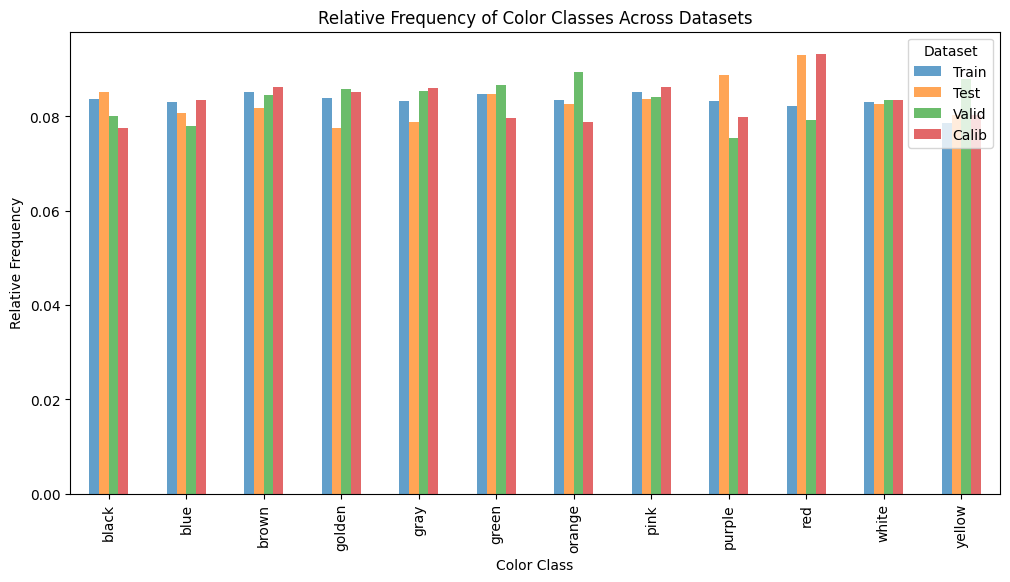

<Figure size 1200x600 with 0 Axes>

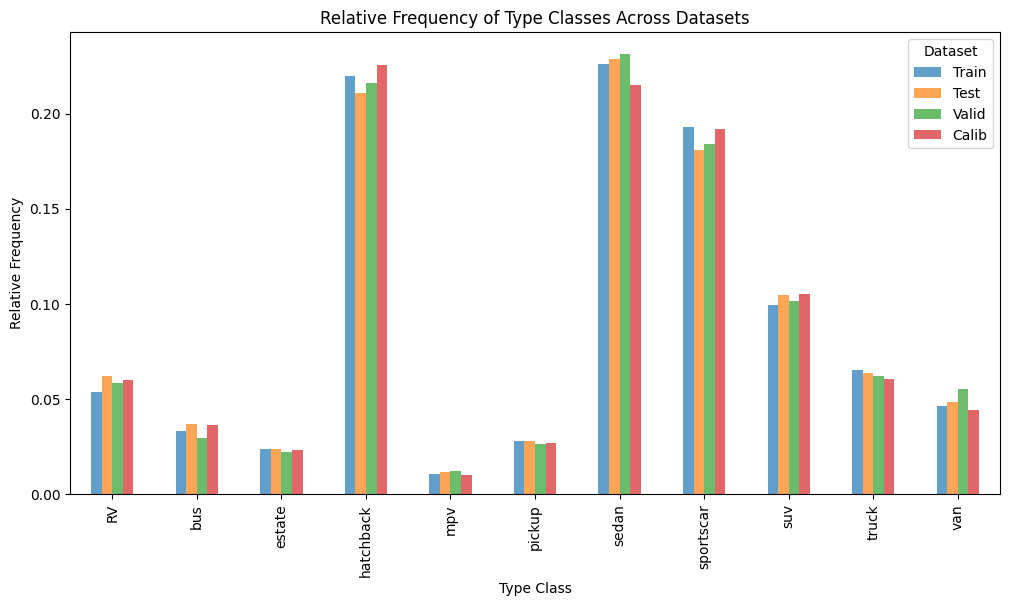

In [5]:
def plot_class_distribution(dfs: dict[str, pd.DataFrame], class_name):
    color_ratios = pd.DataFrame(
        {
            "Train": dfs["Train"][f"{class_name} Class"].value_counts(normalize=True),
            "Test": dfs["Test"][f"{class_name} Class"].value_counts(normalize=True),
            "Valid": dfs["Valid"][f"{class_name} Class"].value_counts(normalize=True),
            "Calib": dfs["Calib"][f"{class_name} Class"].value_counts(normalize=True),
        }
    ).fillna(0)

    plt.figure(figsize=(12, 6))
    color_ratios.plot(kind="bar", figsize=(12, 6), alpha=0.7)
    plt.title(f"Relative Frequency of {class_name} Classes Across Datasets")
    plt.xlabel(f"{class_name} Class")
    plt.ylabel("Relative Frequency")
    plt.legend(title="Dataset")
    plt.show()


plot_class_distribution(dfs, "Color")
plot_class_distribution(dfs, "Type")

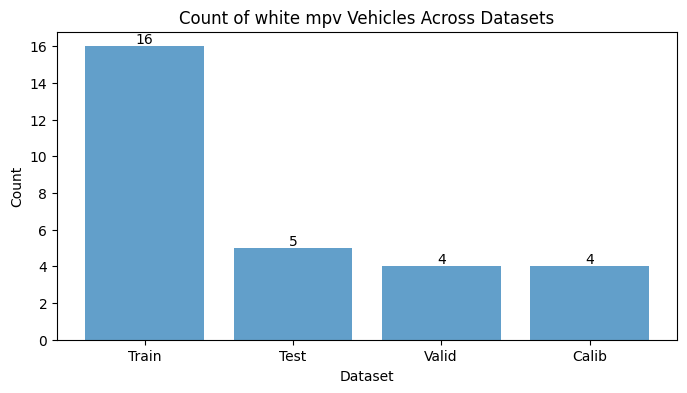

In [6]:
type_class = 4
color_class = 6


def count_vehicle(dfs, type_class, color_class):
    count = {}
    for name, df in dfs.items():
        count[name] = len(
            df[
                (df["Color Class"] == color_labels[color_class])
                & (df["Type Class"] == type_labels[type_class])
            ]
        )
    return count


def plot_vehicle_count(dfs, type_class, color_class):
    count = count_vehicle(dfs, type_class, color_class)
    plt.figure(figsize=(8, 4))
    plt.bar(count.keys(), count.values(), alpha=0.7)
    plt.title(
        f"Count of {color_labels[color_class]} {type_labels[type_class]} Vehicles Across Datasets"
    )
    for i, (_, value) in enumerate(count.items()):
        plt.text(i, value, str(value), ha="center", va="bottom")
    plt.xlabel("Dataset")
    plt.ylabel("Count")
    plt.show()


plot_vehicle_count(dfs, type_class, color_class)